In [11]:
import os
import matplotlib.pyplot as plt
import torch
from eval import *
from preprocessing import *
from lstm import load_fasttext

ROOT_DIR = os.path.dirname(os.path.abspath(""))

In [3]:
# split data into training and validation
val_frac = 0.2
with open(os.path.join(ROOT_DIR, "data", "training_data.json"), "r", encoding="utf8") as _f:
	train_data = json.load(_f)

val_docs = int(val_frac * len(train_data))
val_data = train_data[:val_docs]
with open(os.path.join(ROOT_DIR, "data", "val_set_data.json"), "w", encoding="utf8") as _f:
	json.dump(val_data, _f)
new_train_data = train_data[val_docs:]
with open(os.path.join(ROOT_DIR, "data", "train_set_data.json"), "w", encoding="utf8") as _f:
	json.dump(new_train_data, _f)

In [7]:
ft = load_fasttext()

In [8]:
eval = EvalLSTM(
	save_dir=os.path.join(ROOT_DIR, "temp"),
	results_dir=os.path.join(ROOT_DIR, "data"),
	train_data_path=os.path.join(ROOT_DIR, "data", "train_set_data.json"),
	eval_data_path=os.path.join(ROOT_DIR, "data", "val_set_data.json"),
	fasttext_model=ft,
	lemmatize=False,
	remove_punctuation=True,
	replace_numbers=None,
	verbose=True
)

Creating evaluation tokens...


100%|██████████| 50/50 [00:00<00:00, 67.04it/s]


Creating training tokens...


100%|██████████| 204/204 [00:02<00:00, 72.90it/s]


Precomputing training POS tags...


100%|██████████| 204/204 [00:49<00:00,  4.11it/s]


Precomputing evaluation POS tags...


100%|██████████| 50/50 [00:12<00:00,  3.97it/s]


Loading NLP models...
Precomputing training lemmas...


100%|██████████| 204/204 [00:54<00:00,  3.72it/s]


Precomputing evaluation lemmas...


100%|██████████| 50/50 [00:12<00:00,  4.09it/s]


cuda
Instantiating LSTM...
Training LSTM...
Preparing training set...
Training model...
Epoch [1/1], Batch [4600/4600], Loss: 0.0154760777950286876
Predicting...


100%|██████████| 1105/1105 [00:08<00:00, 131.37it/s]


Calculating metrics...
{'precision': 0.9602037195348162, 'recall': 0.9602037195348162, 'f1': 0.9602037195348162, 'time': 8.9967}


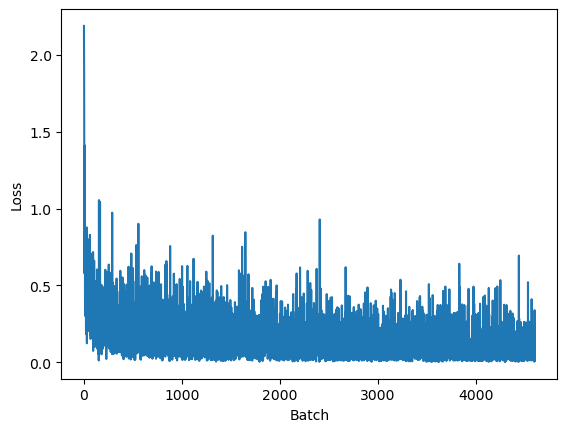

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
hyperparams = {
	"input_dim": 617,
	"hidden_dim": 300,
	"num_layers": 2,
	"output_dim": 9,
	"seq_len": 10,
	"epochs": 1,
	"batch_size": 32,
	"learning_rate": 1e-3,
	"num_workers": 12
}
metrics, losses = eval.evaluate(device, **hyperparams)
print(metrics)
plt.plot(losses)
plt.xlabel("Batch")
plt.ylabel("Loss");

In [14]:
eval.model.save()